In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import MinMaxScaler, RobustScaler, StandardScaler, QuantileTransformer
from sklearn.model_selection import train_test_split
import wrangle
import seaborn as sns
import exploration

In [2]:
z_df = wrangle.wrangle_zillow()



/Users/jarad/codeup_data_science/regression_exercises/wrangle.py:46: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["fed_code"] = df["fips"].astype(int)
/Users/jarad/codeup_data_science/regression_exercises/wrangle.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["year_built"] = df["yearbuilt"].astype(int)
/Users/jarad/codeup_data_science/regression_exercises/wrangle.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_ind

In [15]:
z_df.head(-5)

,Unnamed: 0,taxamount,regionidcounty,fed_code,beds,home_value,sq_ft,baths,lot_size,pools,garages,pool_encoded,bed_bath_ratio,overall_size,house_age
0,0,11013.72,1286.0,6059,4,1023282.0,3100.0,3.5,4506.0,False,2.0,0,1.142857,7606.0,19
1,1,5672.48,2061.0,6111,2,464000.0,1465.0,1.0,12647.0,False,1.0,0,2.000000,14112.0,50
2,2,6488.30,1286.0,6059,3,564778.0,1243.0,2.0,8432.0,True,2.0,1,1.500000,9675.0,55
3,3,1777.51,3101.0,6037,4,145143.0,2376.0,3.0,13038.0,True,0.0,1,1.333333,15414.0,47
4,4,9516.26,3101.0,6037,4,773303.0,2962.0,3.0,63000.0,True,0.0,1,1.333333,65962.0,67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52430,52430,1391.79,3101.0,6037,2,97499.0,1281.0,2.0,12000.0,False,0.0,0,1.000000,13281.0,63
52431,52431,7312.73,3101.0,6037,3,603333.0,1472.0,2.0,4454.0,False,0.0,0,1.500000,5926.0,90
52433,52433,3465.38,3101.0,6037,2,312183.0,912.0,1.0,4995.0,False,0.0,0,2.000000,5907.0,70
52434,52434,4225.84,3101.0,6037,4,332251.0,2068.0,3.0,7333.0,False,0.0,0,1.333333,9401.0,50


In [4]:
z_df.shape

(49581, 15)

In [5]:

z_train, z_test = train_test_split(z_df, train_size=0.8, random_state=123)
z_train, z_validate = train_test_split(z_train, train_size=0.7, random_state=123)


z_train.shape, z_validate.shape, z_test.shape

((27764, 15), (11900, 15), (9917, 15))

In [6]:
cols_to_scale = ['bed_bath_ratio','sq_ft', 'home_value', 'lot_size', 'house_age', 'overall_size', 'pool_encoded', 'garages']

In [19]:
# def variable_pairs_plot(df, columns):
#     sns.pairplot(z_train[columns] , corner=True ,kind='reg', plot_kws={'line_kws':{'color':'red'}, 'scatter_kws':{'s': 1, 'alpha': 0.5}}) 


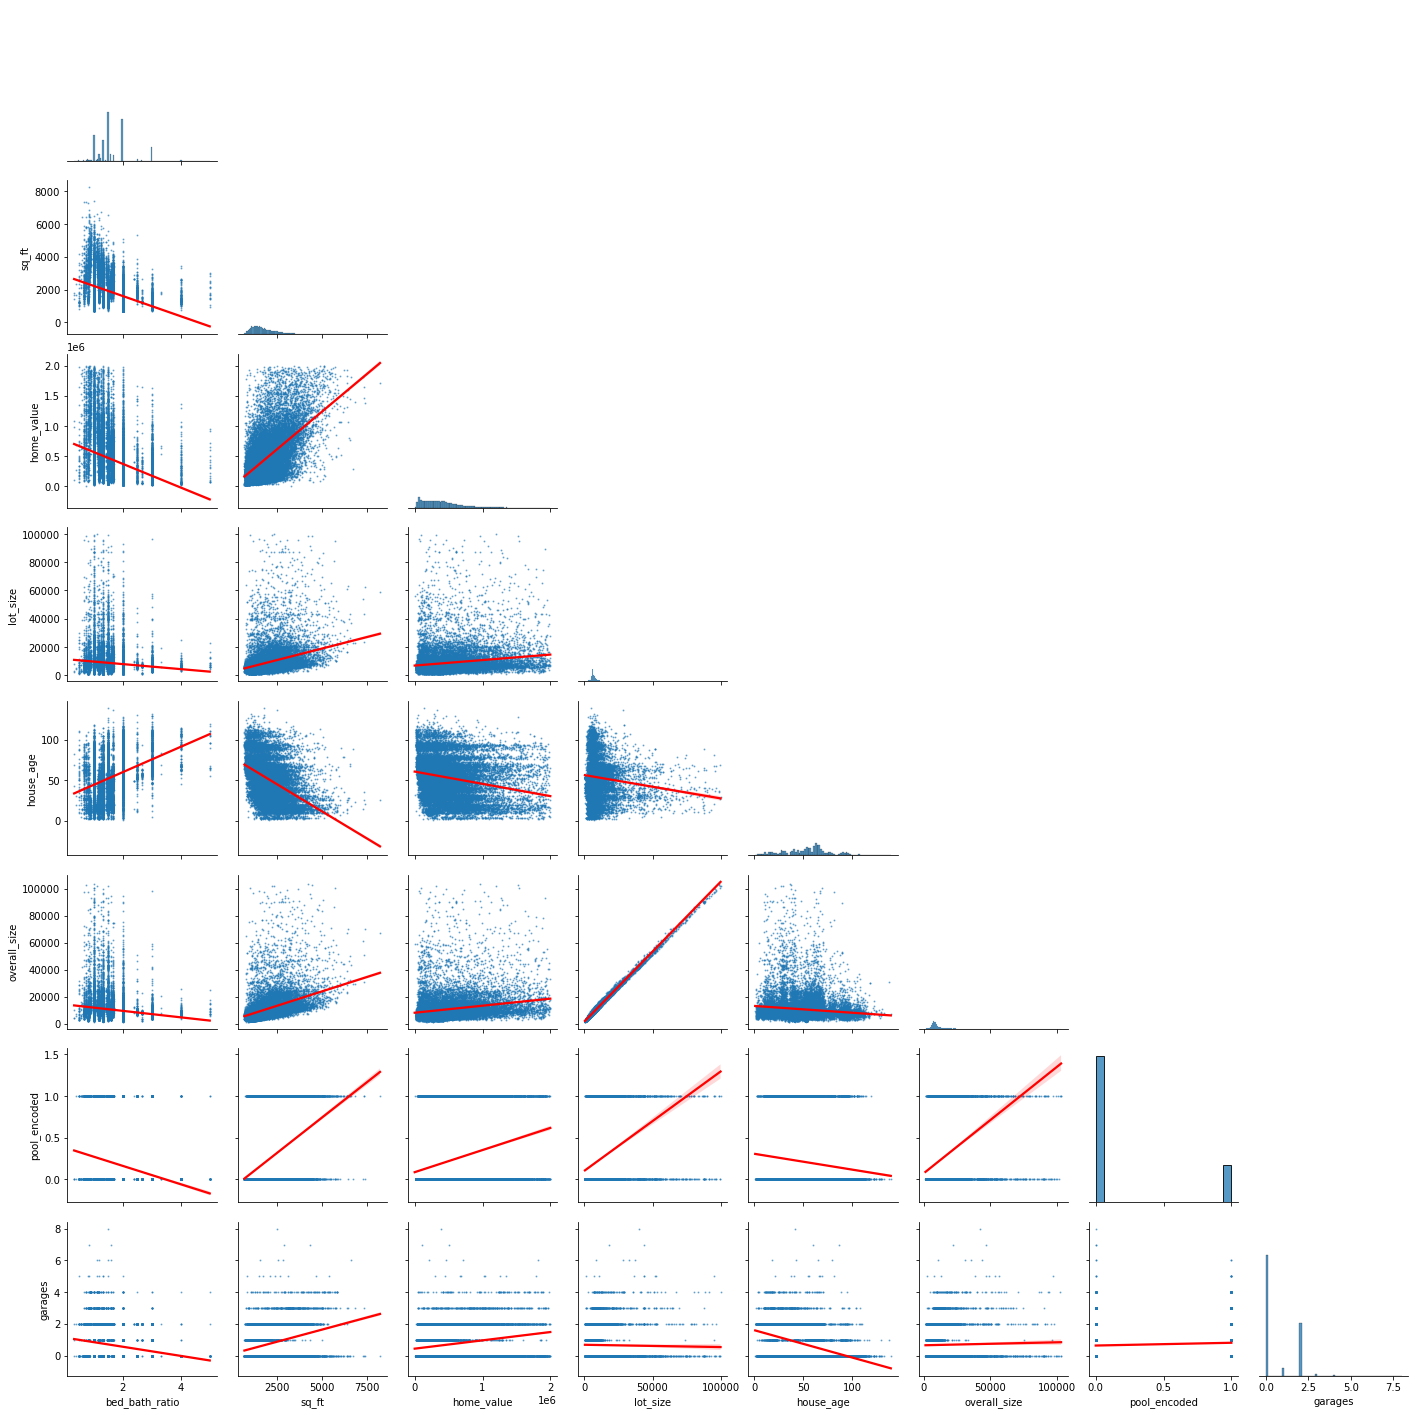

In [7]:
exploration.variable_pairs_plot(z_train, cols_to_scale)

## Takeaways
---

- Sq ft has the largest correlation with home value
- The bed bath ratio shows another good correlation with home value. I made the ratio to take away the multicolinearity of having both bed and bath included
- 20 % of the dataset has a pool and those with a pool have a good correlation to home value
- garages show a correlation and will have to be investigated for statistical significance 
- house age has a negate correlation to home price. the older the home the less valuable but has a lot of variance. Well taken care of and historical old homes may be worth more
- Overall size and lot size are very similar becuase the house makes up a small portion of larger lots.

In [10]:
cont_cols = ['sq_ft', 'bed_bath_ratio', 'lot_size', 'home_value']
cat_cols = ['garages', 'pool_encoded', 'fed_code', 'regionidcounty']

In [11]:
def plot_categorical_and_continuous_vars(df, cat_cols, cont_cols):
    cat = []
    cont = []
    for i in df.columns:
        if df[i].dtype == "float":
            cont.append(i)
        else:
            cat.append(i)
    
    
    for con in cont:
        for cat in cat:
            fig = plt.figure(figsize= (20, 10))
            fig.suptitle(f'{con} vs {cat}')
            

            plt.subplot(131)
            sns.violinplot(data=df, x = cat, y = con)
           

            plt.subplot(1, 3, 3)
            sns.histplot(data = df, x = con, bins = 50, hue = cat)
            
            
            plt.subplot(1, 3, 2)
            sns.barplot(data = df, x = cat, y = con)
          
           

            

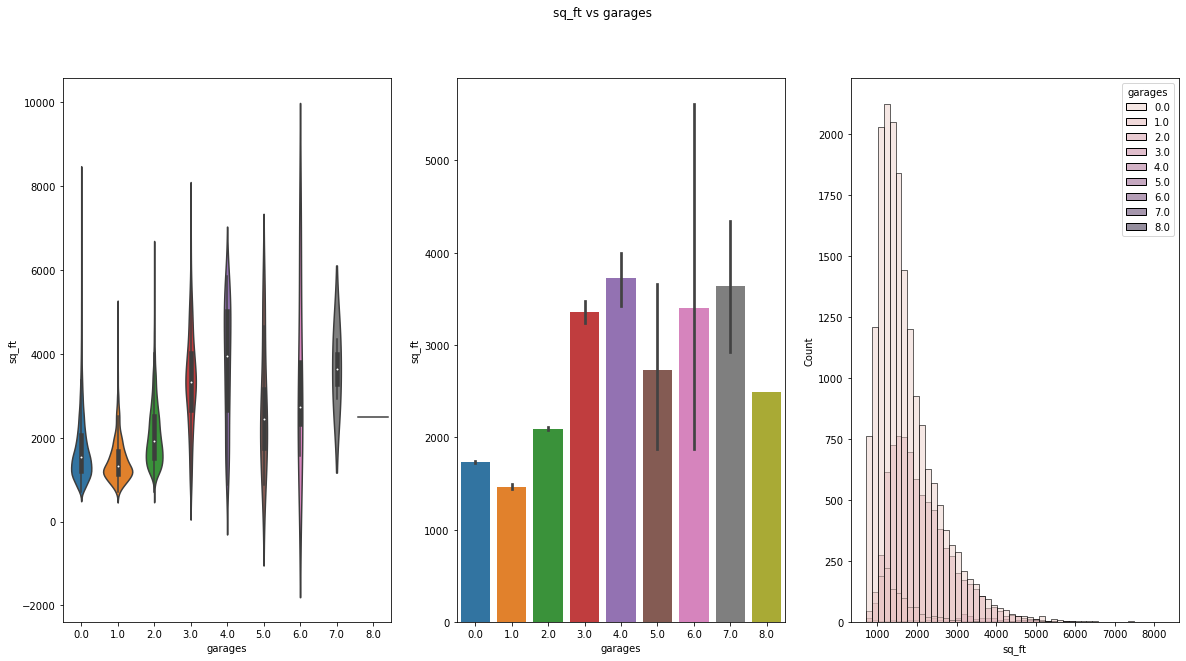

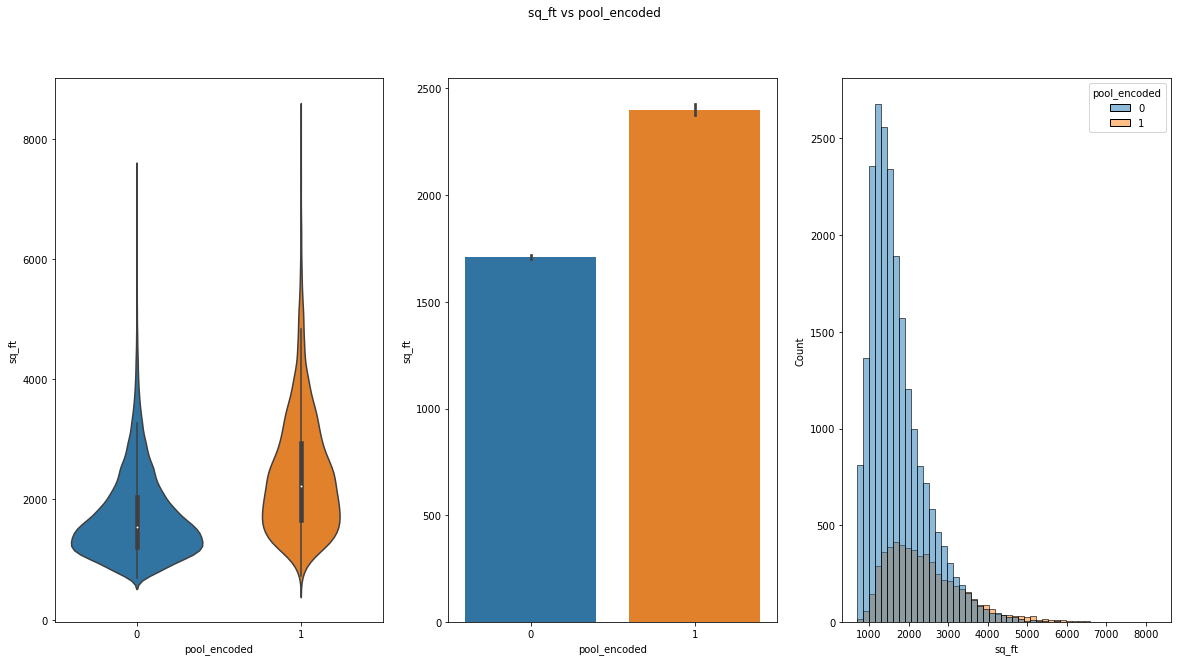

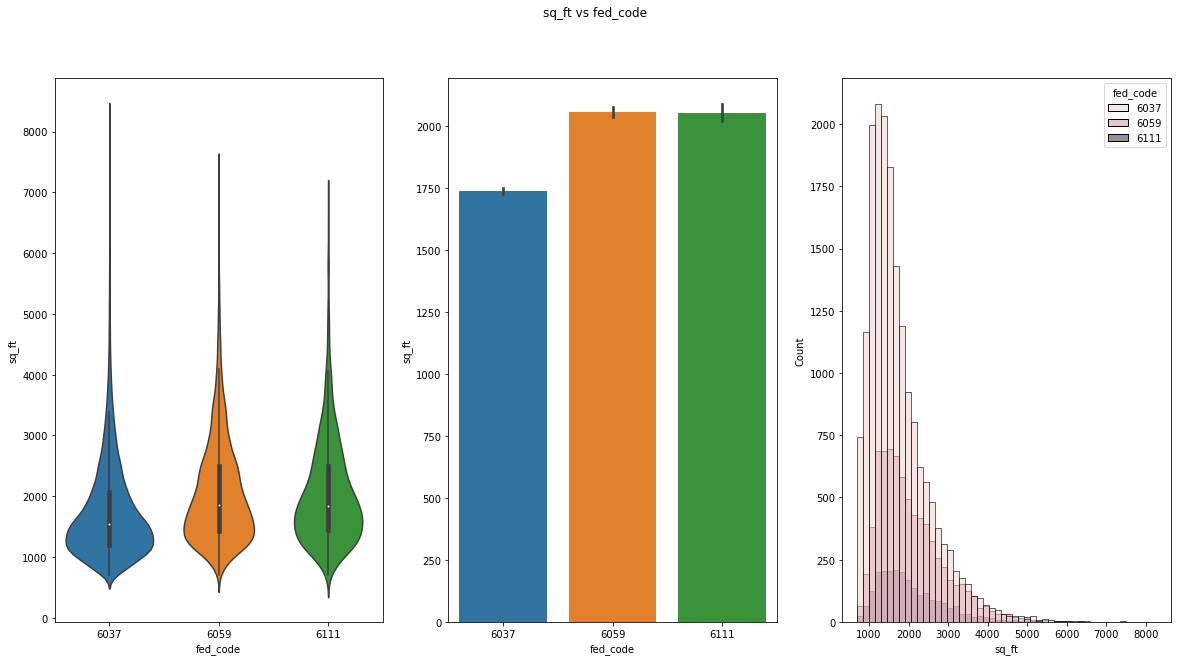

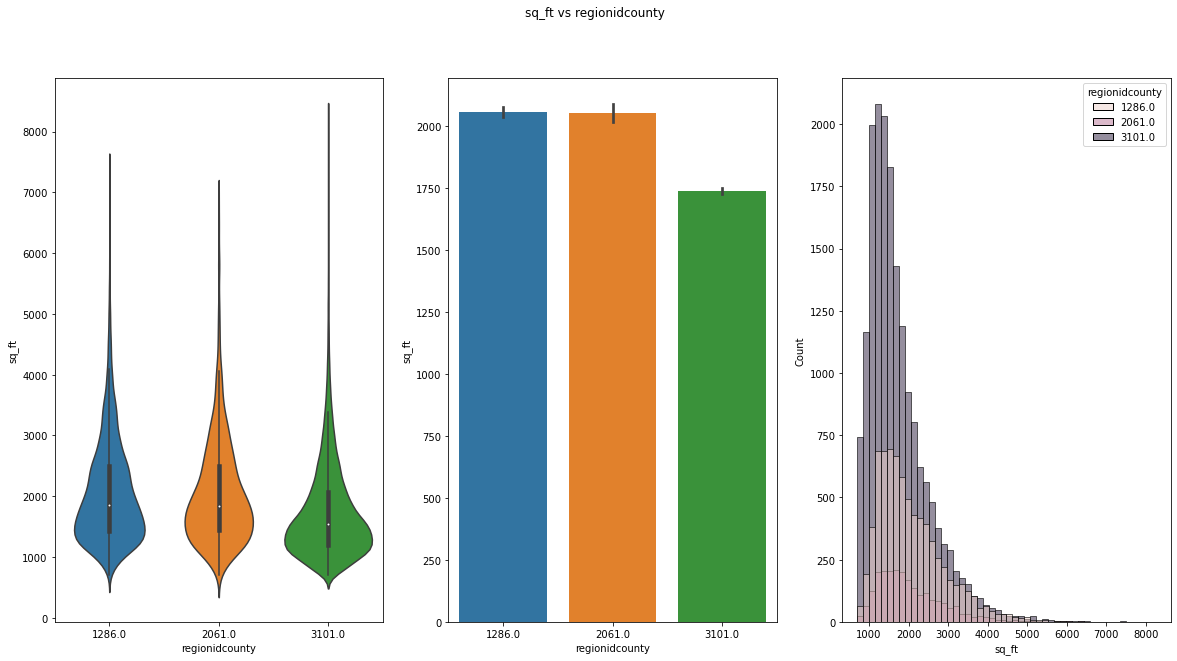

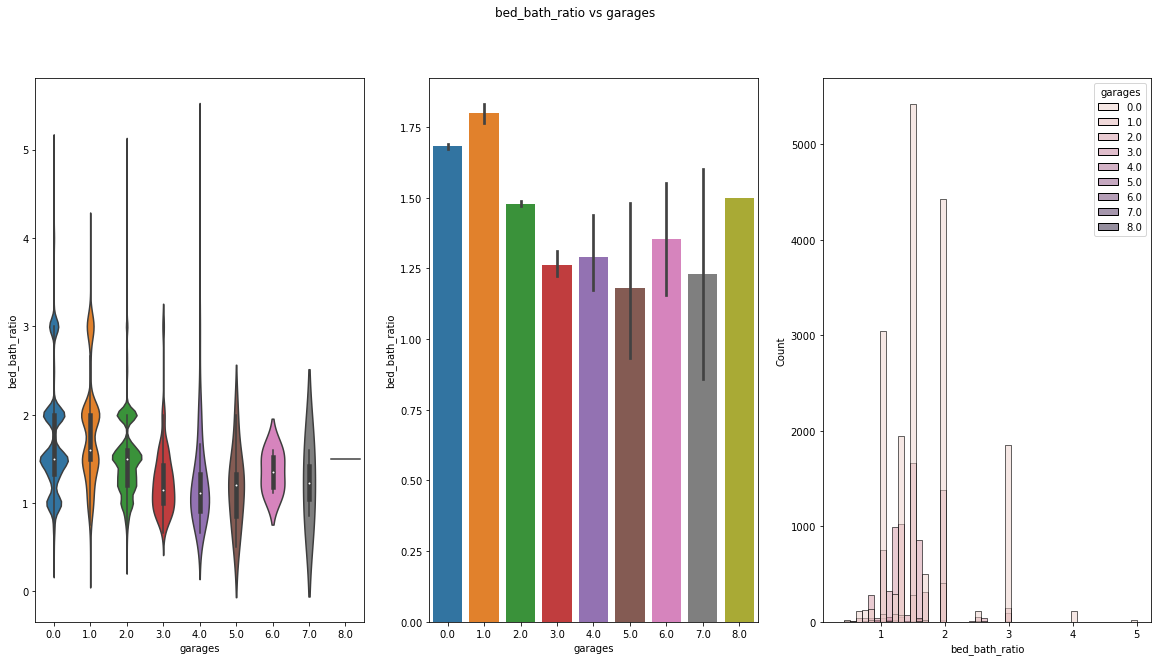

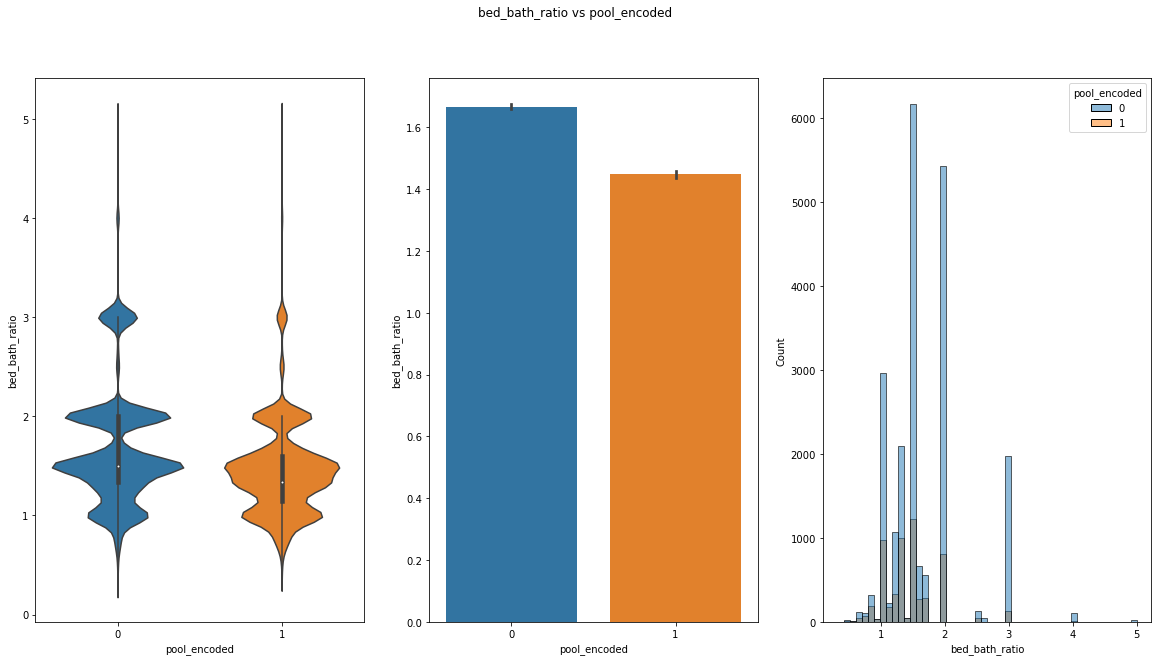

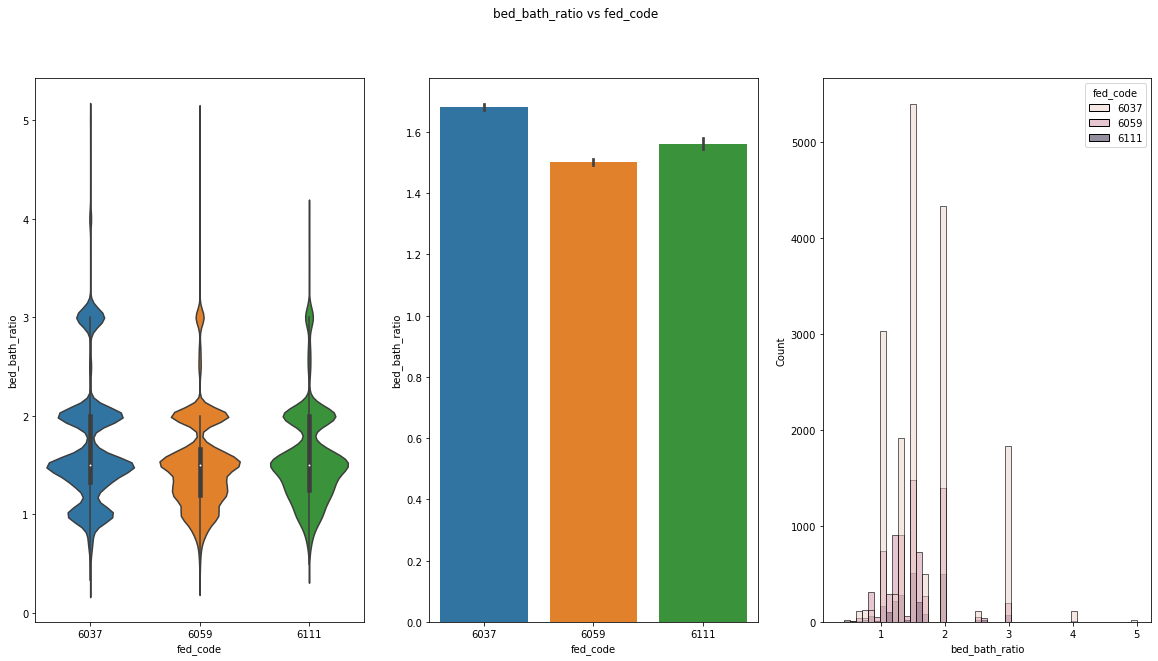

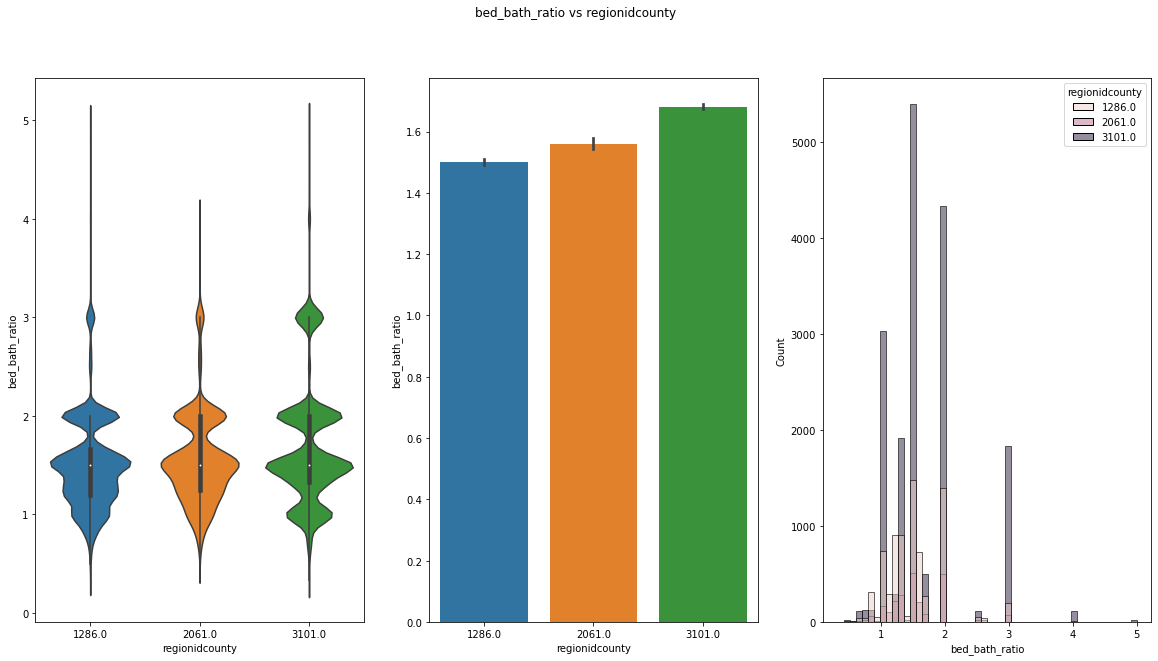

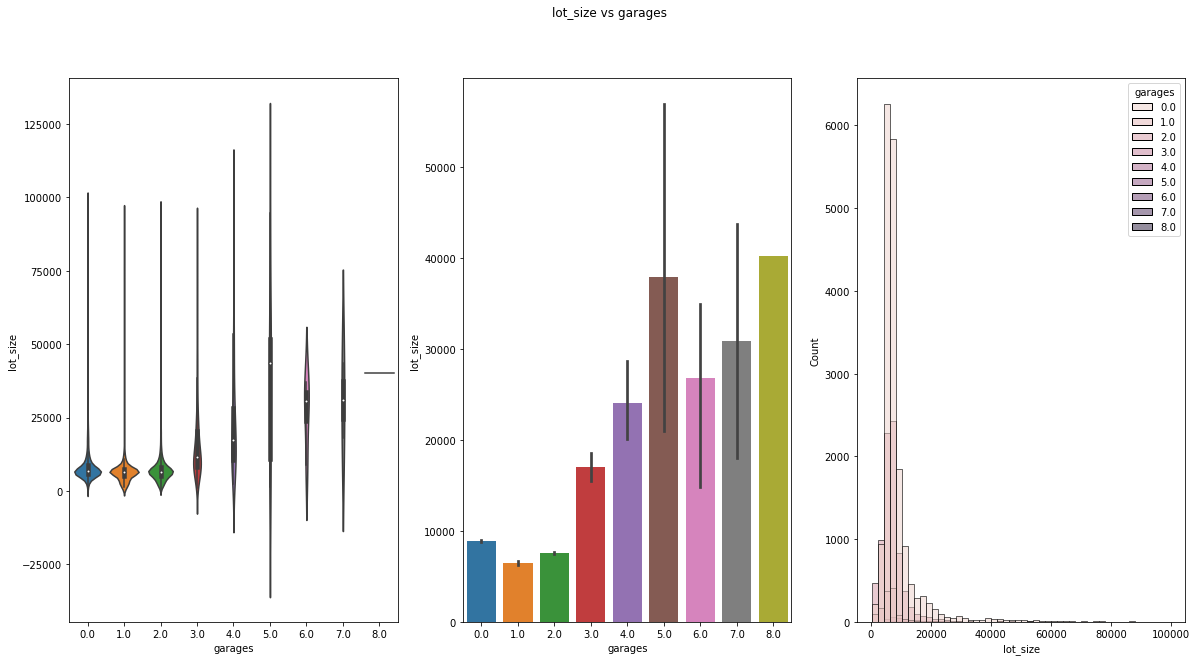

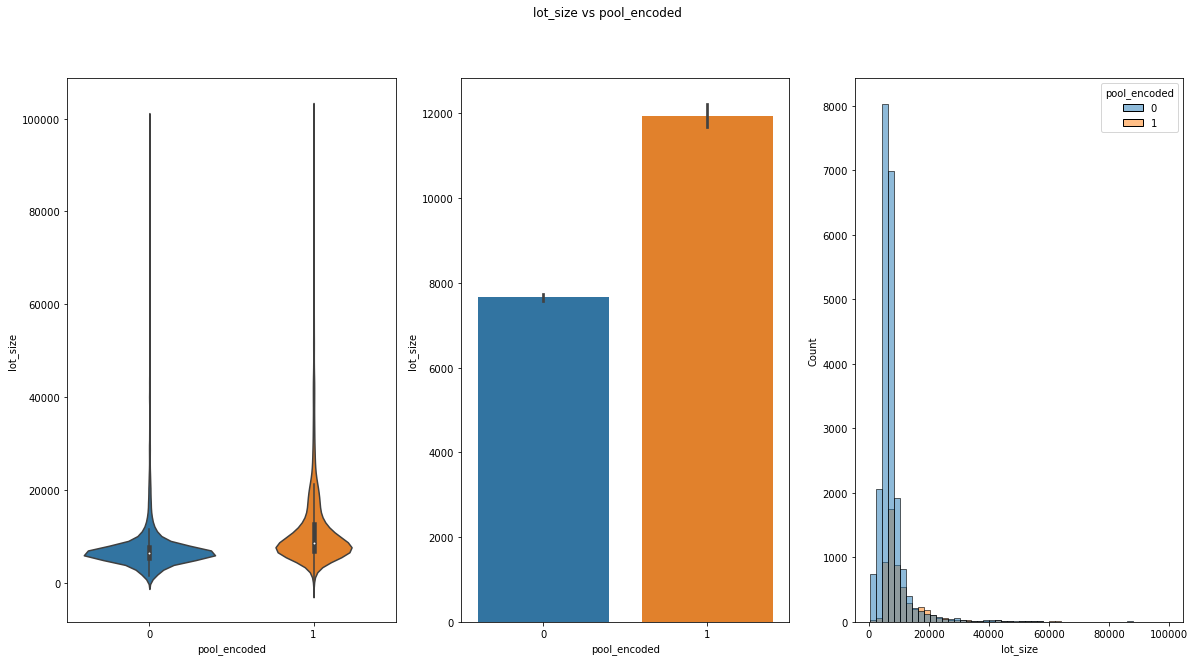

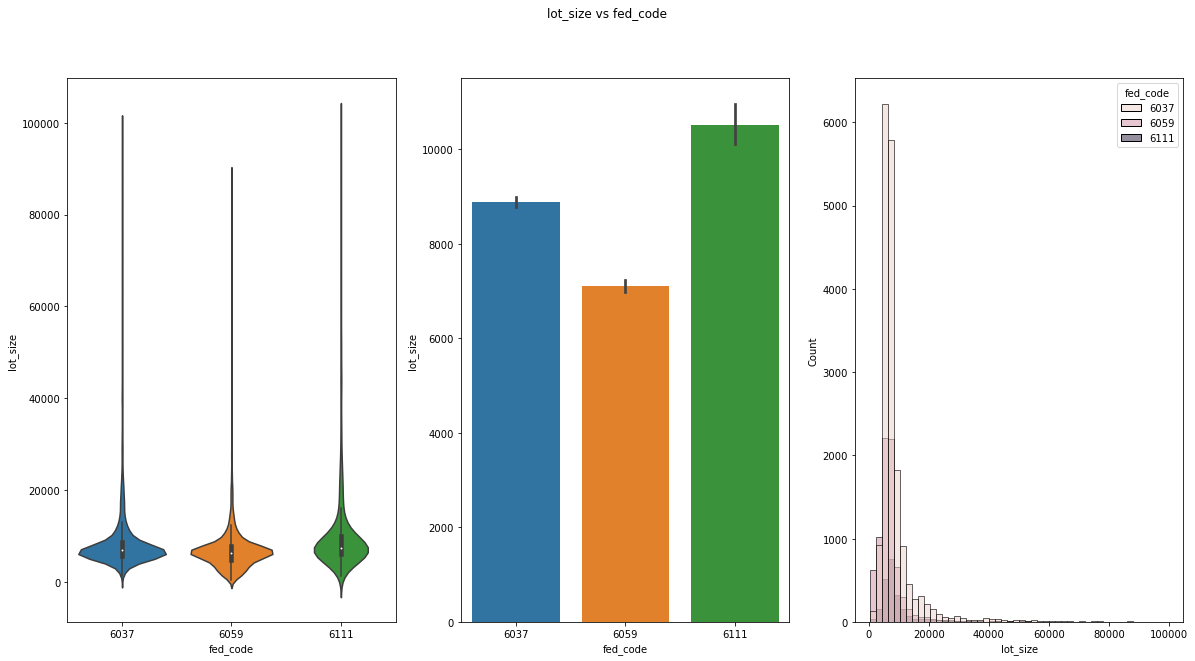

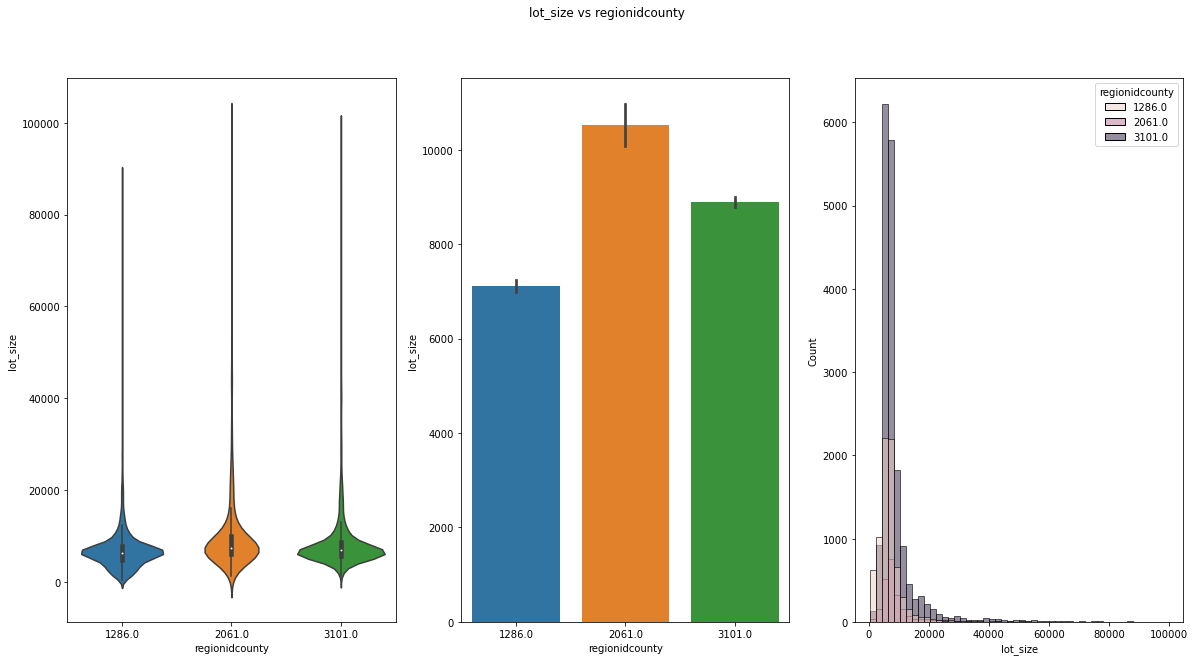

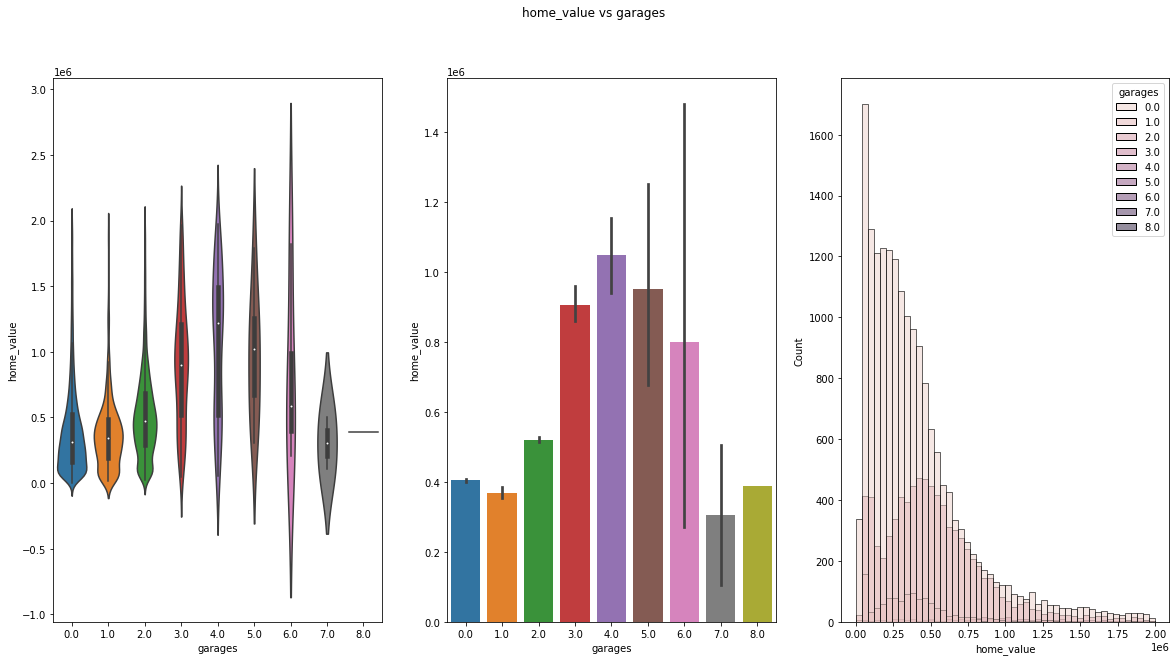

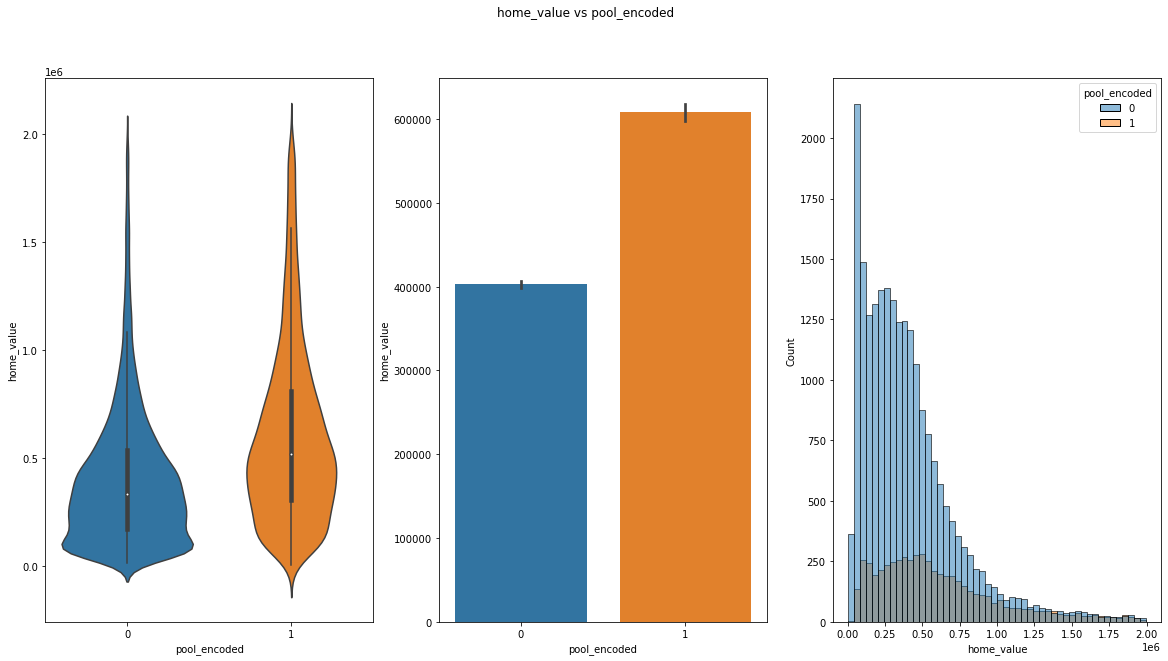

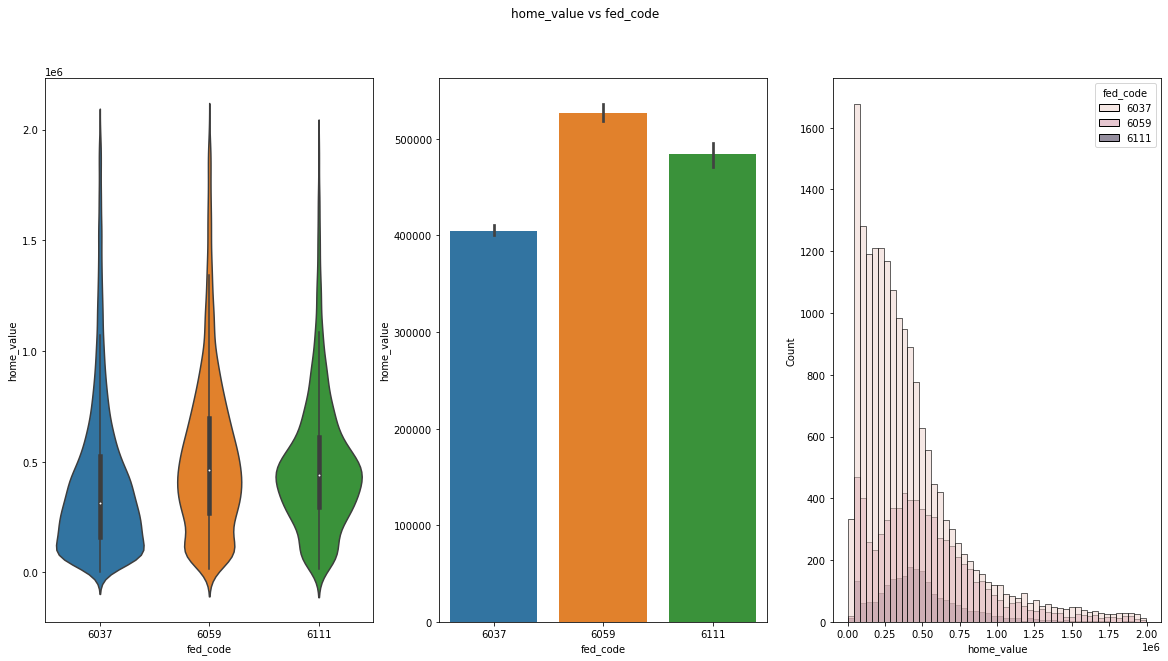

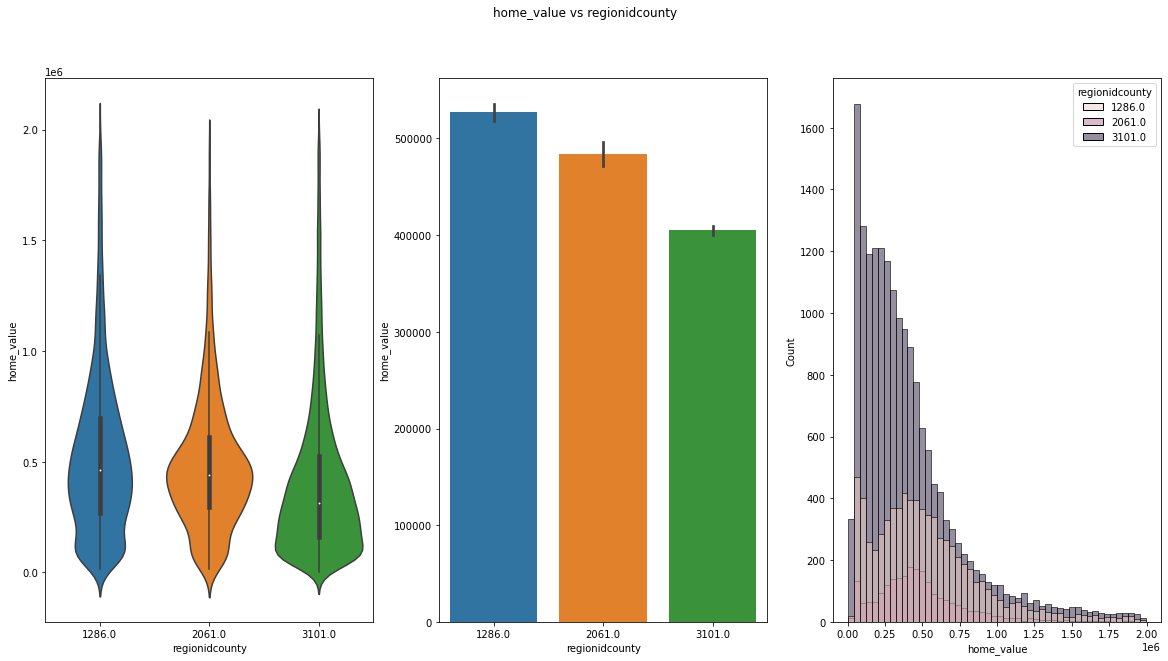

In [11]:
exploration.plot_categorical_and_continuous_vars(z_train, cat_cols, cont_cols)

## Take aways
---
- Sq ft vs garage is skewed to the left with the bulk of the properties do not garages and after a house reaches 2000 sq ft the majority have over 2 car garages
- The larger the house the more likely the possibility of having a pool, the bulk of the houses do not have pools, and about 20% have pools
- The federal code in 6037 has an overall lower square foot, again the data is skewed to the left
- Region county shows a similar stat 
- Bed bath ratio vs garage does not really tell us a whole lot nor does the bed bath ratio vs pools 
- The federal code and bed bath ratio looks fairly even across however the ratio increase as it goes into different reasons
- As lot size increases so does the car count of garages
- As expected as lot increases the probability of the owners having a pool 
- Federal code also seems influence lot size as well as region county id
- Home value and garages shows a decent amount of variance as you increase the amount of garages
- Pools shows an increase in home value when there is a pool
- The federal code also shows difference in value depending on the code
- The same can be said for region region has an influence on house price


## Come up with some initial hypotheses based on your goal of predicting property value.

1. How does the house value relate the overall square foot? lotsize plus sq_ft
2. How does the house value reflect how many bathrooms the house has?
3. How does the house value reflect how many bedroms the house has?
4. How does having a pool affect house value?
5. Does the age of the house affect house value?

<AxesSubplot:>

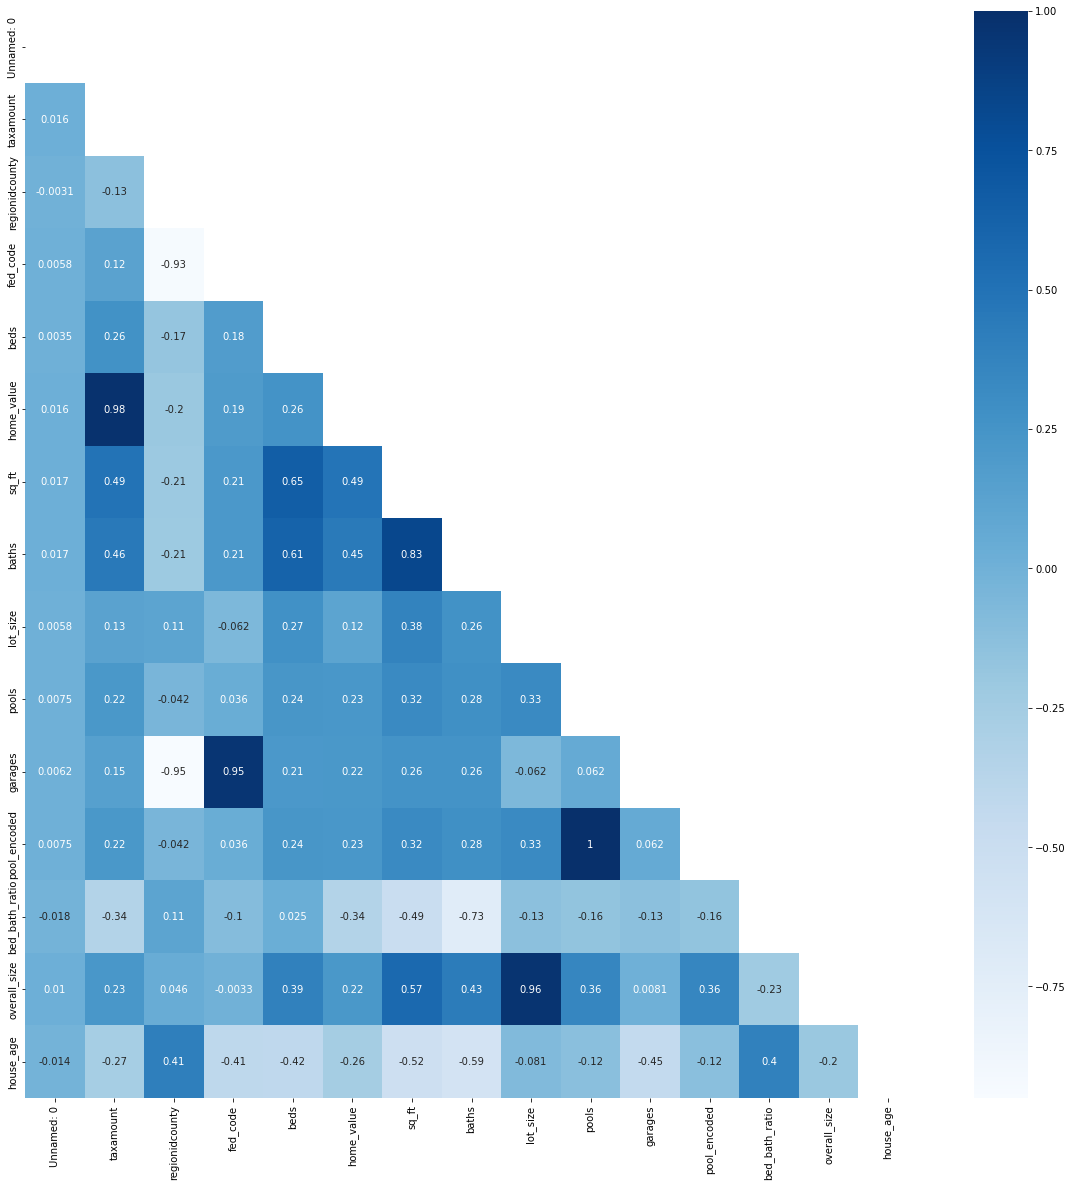

In [12]:
correlation_table = z_train.corr(method='spearman')

plt.figure(figsize= (20,20))
sns.heatmap(correlation_table, cmap='Blues', annot = True, mask = np.triu(correlation_table))

### __Take Aways__
---

* There is multicolinearity amongst multiple variables
* We can see why tax amount would be cheating becuase it is almost 1
* Using lot size does not have correlation to target value as much as sq_ft but I will make new variable to try and get around that
* I will also make a bed bath ratio so that we can avoid the multicolinearity between the two 